## Parte 3: DIBRIS graph
In questa sezione andiamo ad analizzare il nostro grafo reale.

Abbiamo visto che il grafo è di tipo smallworld, per cui ci aspettiamo che attacchi nei confronti dei nodi con alta closeness e betweenness abbiano molto effetto, mentre attacchi di tipo clustering non abbiano effetto.

In [1]:
import networkx
graph = networkx.read_adjlist("../graphs/dibris_graph.txt")

In [2]:
# Import functions
import random
import operator

random.seed(42)

def get_highest_degree_node(G):
    return sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]

def get_random_node(G):
    list_of_nodes = G.nodes()
    return random.sample(list_of_nodes, 1)[0]

def get_highest_closeness_node(G):
    return sorted(networkx.closeness_centrality(G).items(), key=operator.itemgetter(1),reverse=True)[0][0]

def get_highest_betwennes_node(G):
    return sorted(networkx.betweenness_centrality(G).items(), key=operator.itemgetter(1),reverse=True)[0][0]

def get_highest_clustering_node(G):
    return sorted(networkx.clustering(G).items(), key=operator.itemgetter(1),reverse=True)[0][0]

def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)
def get_giant_component_size(G):
    return len(sorted(connected_component_subgraphs(G), key=len, reverse=True)[0])

In [3]:
# Analyze relative giant component size (relative to the starting graph size)

# Saving inital graph' size
n_nodes = len(graph)

# Creating list variable to iterate
graphs = []
sizes = []
functions = []

# One graph copy and one array of data for each tecnique
random_graph = graph.__class__(graph)
random_giant_sizes = []
graphs.append(random_graph)
sizes.append(random_giant_sizes)
functions.append(get_random_node)

degree_graph = graph.__class__(graph)
degree_giant_sizes = []
graphs.append(degree_graph)
sizes.append(degree_giant_sizes)
functions.append(get_highest_degree_node)

closeness_graph = graph.__class__(graph)
closeness_giant_sizes = []
graphs.append(closeness_graph)
sizes.append(closeness_giant_sizes)
functions.append(get_highest_closeness_node)

betweenness_graph = graph.__class__(graph)
betweenness_giant_sizes = []
graphs.append(betweenness_graph)
sizes.append(betweenness_giant_sizes)
functions.append(get_highest_betwennes_node)


clustering_graph = graph.__class__(graph)
clustering_giant_sizes = []
graphs.append(clustering_graph)
sizes.append(clustering_giant_sizes)
functions.append(get_highest_clustering_node)


for i in range(len(graphs)):
        sizes[i].append(get_giant_component_size(graphs[i]) / n_nodes)

for _ in range(len(graph) - 1):
    # Per ogni tipo di attacco
    for i in range(len(graphs)):
        node_to_remove = functions[i](graphs[i])
        graphs[i].remove_node(node_to_remove)
        sizes[i].append(get_giant_component_size(graphs[i]) / n_nodes)

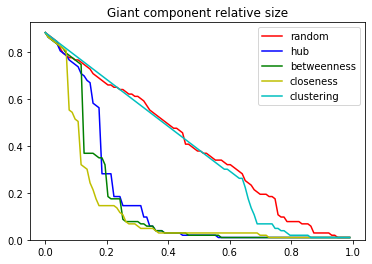

In [4]:
# Plotting size results
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 1, 1.0/len(graph))

legends = ["random", "hub", "betweenness", "closeness", "clustering"]
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i in range(len(sizes)): 
    plt.plot(x[:-1], sizes[i], colors[i], label=legends[i])

plt.title("Giant component relative size")
plt.ylim(ymin=0)
plt.legend()
plt.show()

In [5]:
# Analyze diameter 
def get_diameter(G):
    components = sorted(connected_component_subgraphs(G), key=len, reverse=True)
    # Se la grandezza del giant component è piu piccola del resto del grafo allora è inutile calcolare il diametro
    if len(components[0]) < len(G) - len(components[0]):
        return False
    return networkx.diameter(components[0])

# Creating list variable to iterate
graphs = []
diameters = []
functions = []

# One graph copy and one array of data for each tecnique
random_graph = graph.__class__(graph)
random_giant_diameters = []
graphs.append(random_graph)
diameters.append(random_giant_diameters)
functions.append(get_random_node)

degree_graph = graph.__class__(graph)
degree_giant_diameters = []
graphs.append(degree_graph)
diameters.append(degree_giant_diameters)
functions.append(get_highest_degree_node)

closeness_graph = graph.__class__(graph)
closeness_giant_diameters = []
graphs.append(closeness_graph)
diameters.append(closeness_giant_diameters)
functions.append(get_highest_closeness_node)

betweenness_graph = graph.__class__(graph)
betweenness_giant_diameters = []
graphs.append(betweenness_graph)
diameters.append(betweenness_giant_diameters)
functions.append(get_highest_betwennes_node)


clustering_graph = graph.__class__(graph)
clustering_giant_diameters = []
graphs.append(clustering_graph)
diameters.append(clustering_giant_diameters)
functions.append(get_highest_clustering_node)

# A causa della complessita computazione del calcolo del diametro non possiamo provarlo troppe volte, calcolo solo 3 volte
# Il diametro è in percentuale al numero di nodi: 100%: devo attraversare tutti i nodi , 1% devo attraversare l'1% dei nodi per raggiungere ogni altro nodo del giant component

initial_diameter = get_diameter(graphs[i]) / get_giant_component_size(graphs[i])

for i in range(len(graphs)):
        diameters[i].append(initial_diameter)

for j in range(len(graph) - 1):
    # Per ogni tipo di attacco
    end = False
    for i in range(len(graphs)):
        node_to_remove = functions[i](graphs[i])
        graphs[i].remove_node(node_to_remove)
        # Qui decido quando computare il diametro
        if (j + 1) % 5 == 0:
            diameter = get_diameter(graphs[i])
            if diameter != False: 
                diameters[i].append(diameter / get_giant_component_size(graphs[i]))
            else:
                # Se è inutile calcolare il diametro termino
                diameters[i].append(1)
                end = True
    if end:
        break

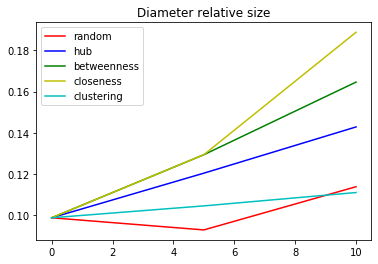

In [6]:
# Plotting diameter results

x = [0, 5, 10]

legends = ["random", "hub", "betweenness", "closeness", "clustering"]
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i in range(len(diameters)): 
    # Rimuovo dai diametri l'ultimo elemento perché non ha valore
    plt.plot(x, diameters[i][:-1], colors[i], label=legends[i])

plt.title("Diameter relative size")
plt.legend()
plt.show()

### Considerazioni

Sia per quanto riguarda la dimensione della giant component i dati sono conformi a quanto ci aspettavamo quasi nella totalità delle tipologie. In la dimensione della giant size dimostra che il grafo è molto simile anche una rete di tipo scalefree perché attacchi random non hanno particolare effetto.